# Test a Perceptual Phenomenon
### By Linn Olsson

### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace.

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import shapiro
from scipy import stats

In [2]:
# Import CSV file
stroopdata = pd.read_csv('stroopdata.csv')

# View data
print("Stroopdata dataframe:")
print(stroopdata)

Stroopdata dataframe:
    Congruent  Incongruent
0      12.079       19.278
1      16.791       18.741
2       9.564       21.214
3       8.630       15.687
4      14.669       22.803
5      12.238       20.878
6      14.692       24.572
7       8.987       17.394
8       9.401       20.762
9      14.480       26.282
10     22.328       24.524
11     15.298       18.644
12     15.073       17.510
13     16.929       20.330
14     18.200       35.255
15     12.130       22.158
16     18.495       25.139
17     10.639       20.429
18     11.344       17.425
19     12.369       34.288
20     12.944       23.894
21     14.233       17.960
22     19.710       22.058
23     16.004       21.157


**(1) What is the independent variable? What is the dependent variable?**

Independent variable = words condition (congruent or incongruent)
<br/>
Dependent variable = time to complete test (in seconds)
<br/>

**(2) a) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. b) What kind of statistical test do you expect to perform? Justify your choices.**

a) Null-hypothesis, H0: Congruency does **not** effect time to complete test, there is no difference in the time it takes to complete the congruent or the incongruent words tests.

Alternative hypothesis, HA: Congruency **does** effect time to complete test, it takes longer to complete the incongruent words test compared to the congruent words test.

These hypotheses can be made more specific by comparing the mean (μ) time of the samples completing the congruent and incongruent words tests respectively. **'μ' stands for the population mean, 'c' represents the congruent words condition, and 'i' represents the incongruent words condition.**
<br/>

H0: μc = μi
<br/>
HA: μc < μi
<br/>

The **alpha** level, which is the degree of significance in which we accept or reject the null-hypothesis ([source](http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests-significance-levels-alpha-and-p-values-in-statistics)), is set to 0.05. This means there is a 5% risk that a difference exists when there is no actual difference.
<br/>

This hypothesis test is chosen in an attempt to validate the Stroop Effect - a demonstration of interference in the reaction time of a task - which shows that naming the color of a word takes longer and is more prone to errors when the color of the ink is different to the name of the color ([source](https://en.wikipedia.org/wiki/Stroop_effect)). With this test, we want to determine if there is enough evidence in the sample data to conclude that it takes longer to complete an incongruent words test compared to a congruent words test for the whole population and not only for this sample.

b) If the data is normally distributed (or has a non-normal distribution but is transformable) a parametric test is preferred to the alternative nonparametric test beacuse it usually has more statistical power ([source](http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)).

Since we want to validate existing research and already have some idea that the incongruent words test will take longer to complete, a **one-tailed dependent t-test** comparing the difference in means would be suitable. A two-tailed test would measure the probability of the relationship in two directions (incongruent words test takes shorter or longer to complete) and a one-tailed test only measures this in one direction of interest and provides more power to detect an effect in one direction by not testing the effect in the other direction ([source](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/)).
<br/>

A dependent t-test is used to measure the difference or change in means between two related groups, meaning that the same participants (24 participants in our sample data) are tested more than once on the same dependent variable (time to complete test) under two different conditions (congruent or incongruent words) ([source](https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php)). Using a dependent t-test for this test is suitable because (1) the dependent variable is continuous, (2) the independent variable consists of two categorical and related groups, and to be investigated; (3) there are no outliers in the data and (4) the data has an approximately normal distribution ([source](https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php)).
<br/>

**(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.**

In [3]:
# Generate descriptive statistics of dataset
stroopdata.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


The stroopdata dataset has 24 observations. The *mean* shows the central value of all data in that column. The *standard deviation (std)* is a measure to quantify the amount of variation in the data by expressing how much the datapoints in a column differ from the mean value of that column.
<br/>

**(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.**

Frequency distribution of Congruent data:


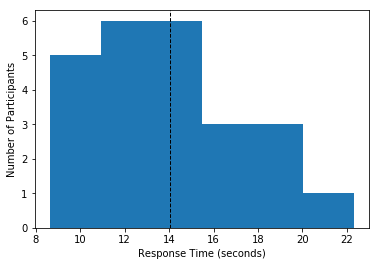

Frequency distribution of Incongruent data:


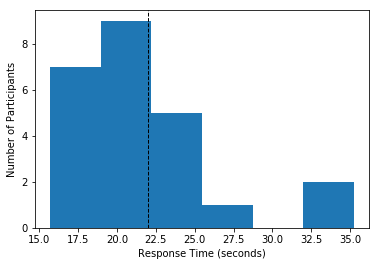

In [4]:
# Frequency distribution of Congruent data (histogram)
# Reference: https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
print("Frequency distribution of Congruent data:")
stroopdata.Congruent.plot.hist(bins = 6)
plt.ylabel('Number of Participants')
plt.xlabel('Response Time (seconds)')
plt.axvline(stroopdata.Congruent.mean(), color = 'black', linestyle = 'dashed', linewidth = 1)
plt.show()

# Frequency distribution of Incongruent data (histogram)
print("Frequency distribution of Incongruent data:")
stroopdata.Incongruent.plot.hist(bins = 6)
plt.ylabel('Number of Participants')
plt.xlabel('Response Time (seconds)')
plt.axvline(stroopdata.Incongruent.mean(), color = 'black', linestyle = 'dashed', linewidth = 1)
plt.show()

The two histograms above show the frequency distribution of the congruent and incongruent variables. The dashed black lines represent the mean. We want to look at the shape of the distribution to understand which statistical test is most suitable for this data. The assumption of normality needs to be checked for many statistical procedures, specifically parametric tests, because their validity depends on it ([source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/)). Both graphs appear to have a slightly right-skewed (positive) distribution, except for two outliers in the incongruent data.

In [5]:
# Remove rows with index 14 and 19 that are outliers 
stroopdata.drop([14, 19], inplace = True)

print("Dataframe after removing outliers with index 14 and 19:")
stroopdata

Dataframe after removing outliers with index 14 and 19:


,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803
5,12.238,20.878
6,14.692,24.572
7,8.987,17.394
8,9.401,20.762
9,14.480,26.282


To fulfill the condition that the dependent variable should not contain any outliers to use the method of a dependent t-test, rows with index 14 and 19, which represent the outliers in the Incongruent data, have been removed.

Frequency distribution of Congruent data transformed by log10:


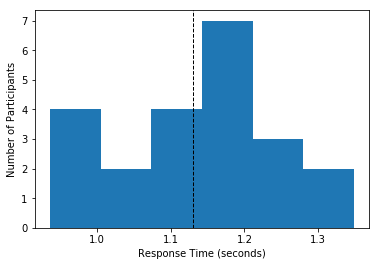

Frequency distribution of Incongruent data transformed by log10:


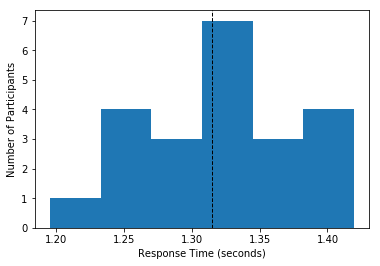

Shapiro-Wilk Test for normality

Congruent data:
Statistics=0.966, p=0.618
Sample looks normal (fail to reject H0)

Incongruent data:
Statistics=0.972, p=0.767
Sample looks normal (fail to reject H0)


In [6]:
# Frequency distribution of Congruent data transformed by log10 (histogram)
# Reference: https://stackoverflow.com/questions/47850202/plotting-a-histogram-on-a-log-scale-with-matplotlib?rq=1
print("Frequency distribution of Congruent data transformed by log10:")
np.log10(stroopdata.Congruent).plot.hist(bins = 6)
plt.ylabel('Number of Participants')
plt.xlabel('Response Time (seconds)')
plt.axvline(np.log10(stroopdata.Congruent).mean(), color = 'k', linestyle = 'dashed', linewidth = 1)
plt.show()

# Frequency distribution of Incongruent data transformed by log10 (histogram)
print("Frequency distribution of Incongruent data transformed by log10:")
np.log10(stroopdata.Incongruent).plot.hist(bins = 6)
plt.ylabel('Number of Participants')
plt.xlabel('Response Time (seconds)')
plt.axvline(np.log10(stroopdata.Incongruent).mean(), color = 'k', linestyle = 'dashed', linewidth = 1)
plt.show()

# Shapiro-Wilk Test (normality test) - congruent data:
# Reference: https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/
print("Shapiro-Wilk Test for normality")
print("")

print("Congruent data:")
stat, p = shapiro(stroopdata.Congruent)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks normal (fail to reject H0)')
else:
	print('Sample does not look normal (reject H0)')

print("")
# Shapiro-Wilk Test (normality test) - incongruent data:
print("Incongruent data:")
stat, p = shapiro(stroopdata.Incongruent)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks normal (fail to reject H0)')
else:
	print('Sample does not look normal (reject H0)')

The two graphs show histograms of the Congruent and Incongruent columns but transformed by log10. A log tranformation can be used on a right-skewed distribution to help it fit a more normal distribution ([source](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/)). The log transformed data appears to show a slightly more normal distribution. We want the data to fulfill the condition of normal distribution to continue with the chosen test method.
<br/>

Last, we have the Shapiro-Wilk Test that tests the null hypothesis (H0) that a sample comes from a normally distributed population ([source](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test)). This is supplementary to the visual assesment of normality. The chosen alpha level for this test is 0.05 and if the p-value is greater than this value, the null hypothesis that the data came from a normally distributed population can not be rejected. After removing the outliers, it appears that the data is normally distributed and suitable for running a parametric statistical test.
<br/>

**(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations?** *Hint: Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.*

In [7]:
# Generate descriptive statistics of dataset
print(stroopdata.describe())

# Calculate difference in mean time between incongruent and incongruent data
print("")
print("Difference in mean time (μ) of Congruent and Incongruent data (seconds):")
print(stroopdata.Incongruent.mean()-stroopdata.Congruent.mean())

print("")
print("Alpha level (α): 0.05")
print("Degrees of freedom (df):", 22-1)
print("T critical value (t*): 1.721") # Reference: https://i.stack.imgur.com/EYE7c.jpg

# Paired sample (dependent) t-test
# Reference: https://pythonfordatascience.org/paired-samples-t-test-python/
print("")
print("Dependent t-test:")
print(stats.ttest_rel(stroopdata['Incongruent'], stroopdata['Congruent']))

# Adjust p-value for a one-tailed test
# Reference: https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy
print("")
print("Divide the p-value in 2 to get the p-value for a one-tailed test:")
print(0.000000004381891625923132/2)

       Congruent  Incongruent
count  22.000000    22.000000
mean   13.939000    20.856318
std     3.592773     2.876923
min     8.630000    15.687000
25%    11.527750    18.668250
50%    14.356500    20.820000
75%    15.827500    22.641750
max    22.328000    26.282000

Difference in mean time (μ) of Congruent and Incongruent data (seconds):
6.91731818182

Alpha level (α): 0.05
Degrees of freedom (df): 21
T critical value (t*): 1.721

Dependent t-test:
Ttest_relResult(statistic=9.5410999084921784, pvalue=4.3818916259231317e-09)

Divide the p-value in 2 to get the p-value for a one-tailed test:
2.190945812961566e-09


At the confidence level of 95% (α = 0.05) with 21 degrees of freedom, the t critical value is 1.72. The calculated t-statistic for the difference in means of the response time of the incongruent and congruent words test data is 9.54. The t-statistic is higher than the t critical value and we can reject the null hypothesis (H0). It is unlikely that the difference in mean time of 6.92 seconds between the congruent and incongruent words test data is found if the two means are the same (if μc = μi). The small p-value of 0.00000000219 indicates that the evidence to reject our null hypothesis is very strong and our test is statistically significant.
<br/>

To summarize, a one-tailed dependent t-test was used to analyze if the time taken to complete a word test (in seconds) is longer when the words in the test are incongruent compared to congruent. The mean time of the congruent words test is 13.94 seconds compared to the mean time of the incongruent words test, which is 20.86 seconds. There is a statistically significant increase in response time of the incongruent words test to the congruent (t(21)=9.54, p=0.00000000219) of 6.92 seconds. This agrees with the notion we had before conducting the test that it takes longer to name the color of a word when the color of the ink is different to the name of the color.
<br/>

**(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!**

There are several theories used to explain the Stroop effect, one of those is the *Processing speed theory*. The processing speed theory suggests there is a lag in the brain's ability to recognize the color of the word since the brain reads words faster than it recognizes colors, based on the idea that word processing is significantly faster than color processing ([source](https://en.wikipedia.org/wiki/Stroop_effect#Theories)). I experienced this myself when doing the Stroop test, the actual word was the first thing I noticed and I had to actively stop looking at the letters in the word to be able to recognise the color of it, almost as if purposely looking at the word in the periphery to make it blurry to be able to recognise the color faster and ignoring the meaning of the word.
<br/>

A similar theory to the Stroop Effect might be the *Simon Effect*. The Simon effect is the finding that reaction times are usually faster and more accurate when the stimulus occurs in the same relative location as the response, even if the stimulus location is irrelevant to the task ([source](https://en.wikipedia.org/wiki/Simon_effect)). This effect does not involve the notion that word processing is faster than color processing but still addresses as similar phenomenon of processing speed where we have an automatic tendency to 'react towards the source of the stimulation'. The same way we automatically appear to process words faster than colors, we will automatically process a task faster if there is a match between stimulus and response features (for example, when the indicator light for the right-sided engine of an aircraft is located to the right on the control panel and not to the left).
<br/>

**References:**
<br/>
http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-hypothesis-tests-significance-levels-alpha-and-p-values-in-statistics

https://en.wikipedia.org/wiki/Stroop_effect

http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/

https://statistics.laerd.com/statistical-guides/dependent-t-test-statistical-guide.php

https://statistics.laerd.com/spss-tutorials/dependent-t-test-using-spss-statistics.php

https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/

https://stackoverflow.com/questions/47850202/plotting-a-histogram-on-a-log-scale-with-matplotlib?rq=1

https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/skewed-distribution/

https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test

https://i.stack.imgur.com/EYE7c.jpg

https://pythonfordatascience.org/paired-samples-t-test-python/

https://stackoverflow.com/questions/15984221/how-to-perform-two-sample-one-tailed-t-test-with-numpy-scipy

https://en.wikipedia.org/wiki/Simon_effect